In [100]:
#imports 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from textwrap import wrap
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns




In [101]:
#create dataframe for columns used 
df = pd.read_csv('SurveyData.csv', usecols=[1,2,3,4,5])
df.columns = ['gender', 'degree', 'house','likeliness','compost']

#label categories 
df['gender'] = df['gender'].astype('category')
df['house'] = df['house'].astype('category')
df['degree'] = df['degree'].astype('category')
df['compost'] = df['compost'].astype('category')

likeliness_levels = pd.Categorical(df['likeliness'])
likeliness_levels.categories = ['1 Not Often','2','3','4','5 Very Often']


Male                 25
Female               17
Prefer not to say     1
Name: gender, dtype: int64

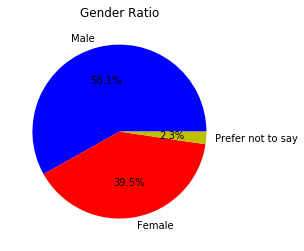

In [102]:
#pie graph of gender ratio 

g_colors = ['blue','r', 'y']
ax = df['gender'].value_counts().plot.pie(colors = g_colors,title = 'Gender Ratio',autopct='%1.1f%%')
ax.set_ylabel('')
df['gender'].value_counts(dropna=True)



Undergraduate    33
Postgraduate     10
Name: degree, dtype: int64

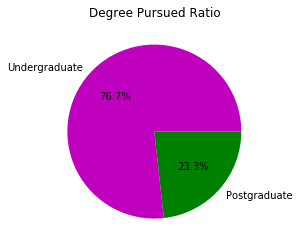

In [103]:
#pie graph of degree pursued 

d_colors=['m','green']
ax = df['degree'].value_counts().plot(kind="pie",colors = d_colors,title = 'Degree Pursued Ratio',autopct='%1.1f%%')
ax.set_ylabel('')
df['degree'].value_counts(dropna=True)

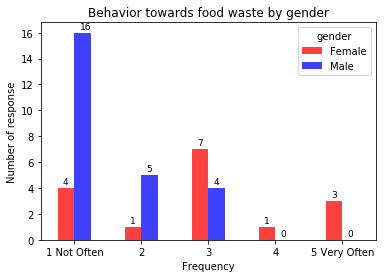

In [104]:
#analysis graph by gender 

table = pd.crosstab(index=likeliness_levels,columns=df['gender'])


ax = table.plot.bar(color = ['r','blue'],alpha=0.75, rot=0)
ax.set_title('Behavior towards food waste by gender')
ax.set_xlabel('Frequency')
ax.set_ylabel('Number of response')

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.08, i.get_height()+0.3, 
            str(round((i.get_height()), 2)), fontsize=9, color='black',
                rotation=0)
    

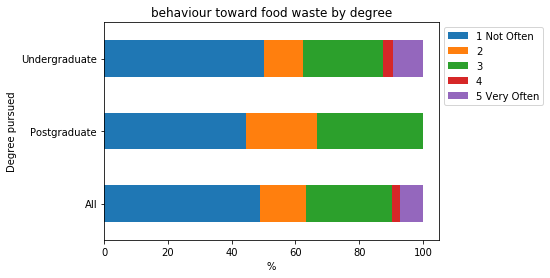

In [105]:
#analysis graph by degrees pursued 


table1 = pd.crosstab(index=df['degree'],columns=likeliness_levels,normalize='index',margins=True)


table1 = table1.sort_values(by='1 Not Often',ascending=False) * 100
table1 = table1.sort_index(ascending = False)


ax1 = table1.plot.barh(stacked=True)
ax1.invert_yaxis()
ax1.set_title('behaviour toward food waste by degree')
ax1.set_xlabel('%')
ax1.set_ylabel('Degree pursued')
ax1.legend(bbox_to_anchor=(1.0, 1.0))





          

Commute from home       27
Off-campus Flat          9
School Accommodation     7
Name: house, dtype: int64

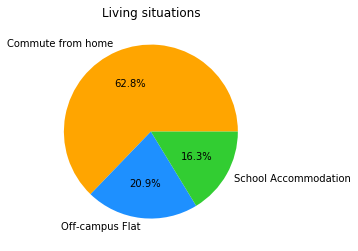

In [106]:
#pie graph of living situation ratio 

g_colors = ['orange','dodgerblue', 'limegreen']
ax = df['house'].value_counts().plot.pie(colors = g_colors,title = 'Living situations',autopct='%1.1f%%')
ax.set_ylabel('')
df['house'].value_counts(dropna=True)

No          23
Yes         14
Not sure     5
Name: compost, dtype: int64

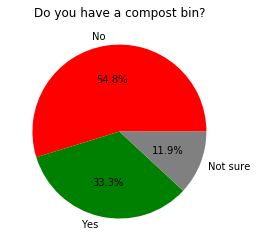

In [107]:
#pie graph of compose bin ratio 

c_colors = ['red','green','gray']
ax = df['compost'].value_counts().plot.pie(colors = c_colors,title = 'Do you have a compost bin?',autopct='%1.1f%%')
ax.set_ylabel('')
df['compost'].value_counts(dropna=True)


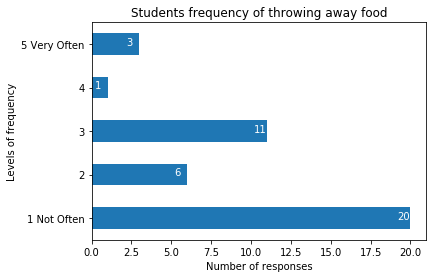

In [108]:
#frequency graph of student's behavior 

df = pd.read_csv('SurveyData.csv', index_col=0)
x_var = 'On average, how often do you throw away food? '

frequency_levels = pd.Categorical(df[x_var])
frequency_levels.categories = ['1 Not Often','2','3','4','5 Very Often']

frequency_levels.dropna()
ax = frequency_levels.value_counts().plot.barh()

ax.set_title('Students frequency of throwing away food')
ax.set_xlabel('Number of responses')
ax.set_ylabel('Levels of frequency')

for i in ax.patches:
    ax.text(i.get_width()-0.8, i.get_y()+0.23, 
            str(round((i.get_width()), 2)), fontsize=10, color='white',
                rotation=0)
    

plt.show()

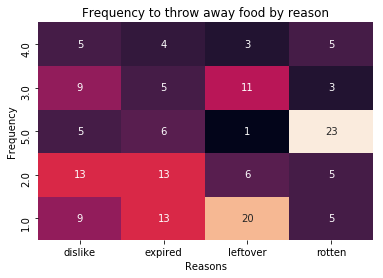

In [109]:
#heat graph of frequency to throw away food by reasons 

df = pd.read_csv('SurveyData.csv', skiprows = [11],usecols=[1,6,7,8,9])
df.columns = ['gender','expired', 'rotten', 'leftover','dislike']


df = df.dropna()
d = pd.DataFrame(columns=['reason','freq'])


for index, row in df.iterrows():
     d = pd.concat([d,pd.DataFrame([
                            ['expired',row['expired']], 
                            ['rotten',row['rotten']],
                            ['leftover',row['leftover']],
                            ['dislike',row['dislike']]
     ],columns=['reason','freq'])],ignore_index=True)



d['freq'] = pd.Categorical(d['freq'])
d['freq'].categories = ['1 Not Often','2','3','4','5 Very Often']
table = pd.crosstab(d['freq'],d['reason'])
table = table.sort_values(by='expired', ascending=False)

ax = sns.heatmap(table, annot=True, cbar=False)
ax.set_ylim(0, 5) 
ax.set_title('Frequency to throw away food by reason') 
ax.set_xlabel('Reasons')
ax.set_ylabel('Frequency')
plt.show()




In [113]:
#reorganize dataframe to correct format 

df = pd.read_csv('SurveyData.csv', skiprows = [11],usecols=[1,6,7,8,9])
df.columns = ['gender','expired', 'rotten', 'leftover','dislike']

df = df.dropna()

d = pd.DataFrame(columns=['female','male'])

td = pd.DataFrame(columns=['female','male'])
t = pd.DataFrame(columns=['female','male'])



dat = pd.crosstab(df['expired'],df['gender'])
dat = dat.fillna(0)

for index, row in dat.iterrows():
    td=pd.DataFrame([[(row[0]*(index+1))/16,(row[1]*(index+1))/25]],columns=['female','male'])
    t = t.append(td)
    print(t)
td = pd.DataFrame([[t.sum(axis=0),t.sum(axis=1)]],columns=['female','male'])
d = d.append(td)
t = pd.DataFrame(columns=['female','male'])
   


   female  male
0   0.375   0.8
   female  male
0   0.375  0.80
0   1.125  0.84
   female  male
0   0.375  0.80
0   1.125  0.84
0   0.250  0.64
   female  male
0   0.375  0.80
0   1.125  0.84
0   0.250  0.64
0   0.625  0.40
   female  male
0   0.375  0.80
0   1.125  0.84
0   0.250  0.64
0   0.625  0.40
0   1.500  0.48


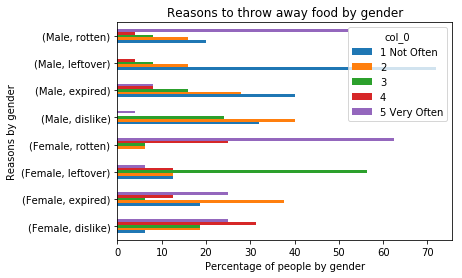

In [111]:
#grouped bar graph of frequency to throw way food for the reason by each gender 

df = pd.read_csv('SurveyData.csv', skiprows = [11],usecols=[1,6,7,8,9])
df.columns = ['gender','expired', 'rotten', 'leftover','dislike']


df = df.dropna()



d = pd.DataFrame(columns=['gender','reason','freq'])


for index, row in df.iterrows():
     d = pd.concat([d,pd.DataFrame([
                            [row['gender'], 'expired',row['expired']], 
                            [row['gender'],'rotten',row['rotten']],
                            [row['gender'],'leftover',row['leftover']],
                            [row['gender'],'dislike',row['dislike']]
     ],columns=['gender','reason','freq'])],ignore_index=True)



freq = pd.Categorical(d['freq'])
freq.categories = ['1 Not Often','2','3','4','5 Very Often']

table = pd.crosstab([d['gender'], d['reason']],freq, normalize='index')

table = table*100
ax = table.plot.barh()
ax.set_title('Reasons to throw away food by gender')
ax.set_xlabel('Percentage of people by gender')
ax.set_ylabel('Reasons by gender')
plt.show()



In [114]:
#simple cross table 
table

col_0            1 Not Often      2      3      4  5 Very Often
gender reason                                                  
Female dislike          6.25  18.75  18.75  31.25         25.00
       expired         18.75  37.50   6.25  12.50         25.00
       leftover        12.50  12.50  56.25  12.50          6.25
       rotten           0.00   6.25   6.25  25.00         62.50
Male   dislike         32.00  40.00  24.00   0.00          4.00
       expired         40.00  28.00  16.00   8.00          8.00
       leftover        72.00  16.00   8.00   4.00          0.00
       rotten          20.00  16.00   8.00   4.00         52.00

In [ ]:
#codes adopted 
#powerpoints given in module 
#pandas documentation 
#